In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

## Sampling threshold values over the search space

In [ ]:
# Import pyveg
sys.path.append("monitoring-ecosystem-resilience")
from pyveg.scripts.optimize_gee_threshold import optimize_threshold

CONST_STDOUT = sys.stdout

# Disable output
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore output
def enablePrint():
    sys.stdout = CONST_STDOUT
    
def eval_threshold(x):
    blockPrint()
    result = optimize_threshold(x)
    enablePrint()
    
    return result

In [ ]:
x_range = range(0, 766)

results = np.zeros([len(x_range), 2], np.float64)

for i, x in enumerate(x_range):
    results[i, 0] = x
    results[i, 1] = eval_threshold(x)
    
np.savetxt("threshold_samples.out", results, delimiter=',')

## Plotting

It takes quite a while to sample threshold values over the search space, thus we use already generated results.

In [2]:
results_loaded = np.loadtxt("thresholds.out", delimiter=',')

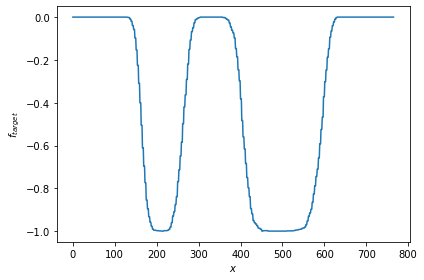

In [3]:
plt.plot(results_loaded[:, 0], -1.0*results_loaded[:, 1])

plt.xlabel('$x$')
plt.ylabel('$f_{target}$')
plt.tight_layout()
plt.savefig('target_function.png', dpi=300)